<h1 style="text-align: center;">Lab1 Project</h1>
<h1 style="text-align: center;">Coronavirus Analysis</h1>

(This project study about covid, which is one of the most infectious viruses in history)


**Member lists**

| Full Name |MSSV|Tasks|Contribution 
| :------ | :---: | :--------- | :---:
|Lâm Thị Xuân Thy|20127082|Preprocessing continents dataset|100%
|Nguyễn Huy Hoàn|20127166|Preprocessing countries dataset|100%
|Bùi Thanh Lâm|20127402|Question 1: Which countries have had high newcases recently and find the reason.|100%
|Đào Ngọc Hoa|20127500|I. Data Colection, II. Read data and preprocessing|100%
|Võ Thanh Lâm|20127546|Question 2: What are the current trends of covid pandemic among continents?|100%

<a class="anchor" id="1"></a>
## I. Collecting data 

In [116]:
# chose the csv file that have the least null values
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import glob

# read the csv file
csv_file = glob.glob('Date*.csv')
csv_file

# read the csv file
df_list = (pd.read_csv(file) for file in csv_file)
null_list = []
# count the N/A values for each csv file and store it in a list
for df in df_list:
    null_list.append(df.isnull().sum().sum())
print(null_list)
# print the csv file that has the least N/A values
print(csv_file[null_list.index(min(null_list))])
# find the csv file that has the least N/A values
min_index = null_list.index(min(null_list))
# read the csv file that has the least N/A values
df = pd.read_csv(csv_file[min_index])
# df.head()



[1320, 1372, 1352, 1272, 1312, 1262, 1519, 1321, 1400, 1387, 1579, 1320, 1263, 1481]
Date2023-03-01.csv


In [ ]:
# calculate the missing precentage for each column
missing_precentage = df.isnull().sum()/df.shape[0] * 100
# print the missing precentage for each column
print(missing_precentage)

In [122]:
# fill the null in the column New cases with 0
df['NewCases'] = df['NewCases'].fillna(0)
df.head()

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\r\n1M pop\r\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop,Date
0,NaN,\r\nAsia\r\n,"214,355,954","+41,975","1,536,777",171.0,"198,988,591","+37,259","13,830,586","15,499",NaN,NaN,NaN,NaN,NaN,Asia,\r\n,NaN,NaN,NaN,NaN,NaN,2023-03-01
1,NaN,\r\nNorth America\r\n,"124,656,575","+19,523","1,611,890",177.0,"119,887,553","+66,330","3,157,132","7,679",NaN,NaN,NaN,NaN,NaN,North America,\r\n,NaN,NaN,NaN,NaN,NaN,2023-03-01
2,NaN,\r\nEurope\r\n,"246,371,508","+56,965","2,017,571",195.0,"241,920,000","+55,072","2,433,937","6,491",NaN,NaN,NaN,NaN,NaN,Europe,\r\n,NaN,NaN,NaN,NaN,NaN,2023-03-01
3,NaN,\r\nSouth America\r\n,"68,023,351","+15,280","1,350,747",144.0,"66,282,371","+9,846","390,233","10,192",NaN,NaN,NaN,NaN,NaN,South America,\r\n,NaN,NaN,NaN,NaN,NaN,2023-03-01
4,NaN,\r\nOceania\r\n,"13,996,345",+48,"26,116",NaN,"13,834,566",+7,"135,663",64,NaN,NaN,NaN,NaN,NaN,Australia/Oceania,\r\n,NaN,NaN,NaN,NaN,NaN,2023-03-01


In [140]:
list_null   = []
list_contries_null = []
# find the countries that have null values in the all columns
for country in df['Country,Other'].unique():
    if df[df['Country,Other'] == country].isnull().sum().sum() > 0:
        list_null.append(df[df['Country,Other'] == country].isnull().sum().sum())
# print(list_null)

# sort descending the list of null values
list_null.sort(reverse=True)
# print the list of null values
print(list_null)
# max number of null values
print(max(list_null))
# print the name of countries that have the most null values
for country in df['Country,Other'].unique():
    if df[df['Country,Other'] == country].isnull().sum().sum() == max(list_null):
        list_contries_null.append(country)
print(list_contries_null)

# oh that the total has the most null values
# so we will drop it
df = df.drop(['TotalCases'], axis=1)
df.head()

[91, 14, 14, 14, 12, 11, 11, 11, 11, 11, 11, 11, 11, 10, 9, 9, 9, 9, 9, 8, 8, 8, 8, 8, 8, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
91
['Total:']


,#,"Country,Other",NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\r\n1M pop\r\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop,Date
0,NaN,\r\nAsia\r\n,"+41,975","1,536,777",171.0,"198,988,591","+37,259","13,830,586","15,499",NaN,NaN,NaN,NaN,NaN,Asia,\r\n,NaN,NaN,NaN,NaN,NaN,2023-03-01
1,NaN,\r\nNorth America\r\n,"+19,523","1,611,890",177.0,"119,887,553","+66,330","3,157,132","7,679",NaN,NaN,NaN,NaN,NaN,North America,\r\n,NaN,NaN,NaN,NaN,NaN,2023-03-01
2,NaN,\r\nEurope\r\n,"+56,965","2,017,571",195.0,"241,920,000","+55,072","2,433,937","6,491",NaN,NaN,NaN,NaN,NaN,Europe,\r\n,NaN,NaN,NaN,NaN,NaN,2023-03-01
3,NaN,\r\nSouth America\r\n,"+15,280","1,350,747",144.0,"66,282,371","+9,846","390,233","10,192",NaN,NaN,NaN,NaN,NaN,South America,\r\n,NaN,NaN,NaN,NaN,NaN,2023-03-01
4,NaN,\r\nOceania\r\n,+48,"26,116",NaN,"13,834,566",+7,"135,663",64,NaN,NaN,NaN,NaN,NaN,Australia/Oceania,\r\n,NaN,NaN,NaN,NaN,NaN,2023-03-01


## II. Data Exploration <a class="anchor" id="2"></a>
(*This process is often interleaved with preprocessing*)

**Import libraries**

In [72]:
import pandas as pd
import glob
import seaborn as sns
import matplotlib.pyplot as plt

**Read data**

In [73]:
csv_files = glob.glob("Date*.csv")
csv_files

['Date2023-02-24.csv',
 'Date2023-02-25.csv',
 'Date2023-02-26.csv',
 'Date2023-02-27.csv',
 'Date2023-02-28.csv',
 'Date2023-03-01.csv',
 'Date2023-03-02.csv',
 'Date2023-03-03.csv',
 'Date2023-03-04.csv',
 'Date2023-03-05.csv',
 'Date2023-03-06.csv',
 'Date2023-03-07.csv',
 'Date2023-03-08.csv',
 'Date2023-03-09.csv']

In [74]:
df_list = (pd.read_csv(file) for file in csv_files)

In [75]:
big_df = pd.concat(df_list, ignore_index=True)

In [76]:
big_df.head()

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\r\n1M pop\r\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop,Date,Tests/\n1M pop\n
0,NaN,\r\nAsia\r\n,"214,177,844","+34,109","1,535,995",199.0,"198,776,221","+42,580","13,865,628","15,540",NaN,NaN,NaN,NaN,NaN,Asia,\r\n,NaN,NaN,NaN,NaN,NaN,2023-02-24 22:52:50.662038,NaN
1,NaN,\r\nNorth America\r\n,"124,454,659","+13,166","1,609,910",100.0,"119,688,106","+39,469","3,156,643","7,752",NaN,NaN,NaN,NaN,NaN,North America,\r\n,NaN,NaN,NaN,NaN,NaN,2023-02-24 22:52:50.662038,NaN
2,NaN,\r\nEurope\r\n,"246,116,716","+51,474","2,016,321",223.0,"241,707,445","+28,487","2,392,950","6,461",NaN,NaN,NaN,NaN,NaN,Europe,\r\n,NaN,NaN,NaN,NaN,NaN,2023-02-24 22:52:50.662038,NaN
3,NaN,\r\nSouth America\r\n,"67,966,089","+15,202","1,350,361",141.0,"66,204,615","+7,649","411,113","10,195",NaN,NaN,NaN,NaN,NaN,South America,\r\n,NaN,NaN,NaN,NaN,NaN,2023-02-24 22:52:50.662038,NaN
4,NaN,\r\nOceania\r\n,"13,987,191","+2,961","26,076",16.0,"13,826,284","+2,416","134,831",64,NaN,NaN,NaN,NaN,NaN,Australia/Oceania,\r\n,NaN,NaN,NaN,NaN,NaN,2023-02-24 22:52:50.662038,NaN


**The number of rows and columns**

In [77]:
rows, cols = big_df.shape
rows, cols

(3458, 24)

**There are 24 columns and 3458 rows**

| Column | Description | Data Type |
| :------ | :--------- | :--------- |
| # | Index | int64 |
|Country,Other| Country name | object |
|TotalCases| Total number of cases | int64 |
|NewCases| New cases | int64 |
|TotalDeaths| Total number of deaths | int64 |
|NewDeaths| New deaths | int64 |
|TotalRecovered| Total number of recovered cases | int64 |
|ActiveCases| Total number of active cases | int64 |
|Serious,Critical| Total number of serious cases | int64 |
|Tot Cases/1M pop| Total cases per 1 million population | int64 |
|Deaths/1M pop| Total deaths per 1 million population | int64 |
|TotalTests| Total number of tests | int64 |
|Tests/1M pop| Total tests per 1 million population | int64 |
|Population| Population | int64 |
|Continent| Continent name | object |
|1 Caseevery X ppl| 1 case every X people | int64 |
|1 Deathevery X ppl| 1 death every X people | int64 |
|1 Testevery X ppl| 1 test every X people | int64 |
|WHO Region| WHO Region | object |
|NewCases/1M pop| New cases per 1 million population | int64 |
|NewDeaths/1M pop| New deaths per 1 million population | int64 |
|ActiveCases/1M pop| Active cases per 1 million population | int64 |
|NewRecovered/1M pop| New recovered cases per 1 million population | int64 |
|Deaths/1M pop| Deaths per 1 million population | int64 |






**Check missing values**

In [78]:
# check for missing values
big_df.isnull().sum()

# check for duplicates
big_df.duplicated().sum()

0

In [79]:
big_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3458 entries, 0 to 3457
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   #                    3234 non-null   float64
 1   Country,Other        3458 non-null   object 
 2   TotalCases           3458 non-null   object 
 3   NewCases             833 non-null    object 
 4   TotalDeaths          3458 non-null   object 
 5   NewDeaths            481 non-null    float64
 6   TotalRecovered       3164 non-null   object 
 7   NewRecovered         824 non-null    object 
 8   ActiveCases          3192 non-null   object 
 9   Serious,Critical     1986 non-null   object 
 10  Tot Cases/1M pop     3234 non-null   object 
 11  Deaths/1M pop        3150 non-null   object 
 12  TotalTests           2982 non-null   object 
 13  Tests/
1M pop
     2769 non-null   object 
 14  Population           3234 non-null   object 
 15  Continent            3402 non-null   obj

*There are some columns having inappropriate data types.*

### Preprocessing

**Convert object to numeric datatypes**

In [80]:
columns = ['TotalCases', 'NewCases', 'TotalDeaths',\
       'TotalRecovered', 'NewRecovered', 'ActiveCases',\
       'Serious,Critical', 'Tot\xa0Cases/1M pop', 'Deaths/1M pop', 'TotalTests',\
       'Tests/\n1M pop\n', 'Population', '1 Caseevery X ppl',\
       '1 Deathevery X ppl', 'New Cases/1M pop', 'Active Cases/1M pop']

In [81]:
big_df[columns] = big_df[columns].apply(lambda x: pd.to_numeric(x.str.replace('\D','',regex=True)))

In [82]:
big_df.describe()

,#,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Population,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop,Tests/\n1M pop\n
count,3234.000000,3.458000e+03,833.000000,3.374000e+03,481.000000,3.164000e+03,824.000000,3.192000e+03,1986.000000,3234.000000,3150.000000,2.982000e+03,3.206000e+03,3206.000000,3122.000000,2982.000000,262.000000,327.000000,3087.000000,2.130000e+02
mean,116.000000,1.377191e+07,6848.469388,1.411393e+05,58.783784,1.436675e+07,9543.112864,4.395243e+05,1250.871601,198170.043290,1312.417778,3.260179e+07,3.469404e+07,404.202121,14465.027867,10.726358,97.328244,0.757829,28595.937804,2.125998e+06
std,66.693643,6.843239e+07,17994.912776,6.828530e+05,115.740204,6.857655e+07,24808.156753,2.420669e+06,5318.384186,200855.140881,1451.017035,1.179653e+08,1.383560e+08,4138.702662,57101.734069,26.697786,276.970625,1.788834,91608.968238,3.627940e+06
min,1.000000,5.000000e+00,1.000000,1.000000e+00,1.000000,2.000000e+00,1.000000,0.000000e+00,0.000000,16.000000,2.000000,7.850000e+03,7.990000e+02,1.000000,153.000000,0.000000,1.000000,0.010000,1.000000,5.091000e+03
25%,58.000000,2.537500e+04,26.000000,2.270000e+02,3.000000,2.327600e+04,33.000000,5.700000e+01,4.000000,17228.000000,175.000000,3.478150e+05,4.454310e+05,3.000000,499.250000,0.000000,4.000000,0.100000,55.000000,1.899430e+05
50%,116.000000,2.510710e+05,187.000000,2.804500e+03,11.000000,3.079295e+05,273.000000,1.327000e+03,17.000000,124778.000000,818.000000,2.226216e+06,5.797805e+06,8.000000,1255.000000,1.000000,13.000000,0.300000,537.000000,8.851190e+05
75%,174.000000,2.037773e+06,3870.000000,1.987800e+04,62.000000,2.439497e+06,3774.250000,1.404100e+04,74.000000,328416.000000,2063.000000,1.303338e+07,2.210284e+07,58.000000,6120.000000,5.000000,86.250000,0.700000,3284.000000,2.439107e+06
max,231.000000,6.811435e+08,134557.000000,6.808754e+06,705.000000,6.540801e+08,177825.000000,2.044346e+07,40670.000000,873844.000000,8735.000000,1.168330e+09,1.448471e+09,62616.000000,626161.000000,196.000000,3083.000000,20.000000,611101.000000,2.330212e+07


**Convert `Date` to datatime type**

In [83]:
big_df['Date'] = pd.to_datetime(big_df['Date']).dt.date

# Countries

In [84]:
countries_df = big_df.dropna(subset=['#'])
countries_df.head()

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\r\n1M pop\r\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop,Date,Tests/\n1M pop\n
8,1.0,China,503302,NaN,5272.0,NaN,379053.0,NaN,118977.0,7557.0,347.0,4.0,1.600000e+08,"110,461",1.448471e+09,Asia,2878.0,274748.0,9.0,NaN,NaN,82.0,2023-02-24,NaN
9,2.0,USA,105169945,8922.0,1144441.0,73.0,102567861.0,34979.0,1457643.0,2588.0,314123.0,3418.0,1.164028e+09,"3,476,731",3.348053e+08,North America,3.0,293.0,0.0,27.0,0.2,4354.0,2023-02-24,NaN
10,3.0,India,44685799,180.0,530764.0,NaN,44152945.0,106.0,2090.0,NaN,31768.0,377.0,9.183245e+08,"652,854",1.406632e+09,Asia,31.0,2650.0,2.0,1.0,NaN,1.0,2023-02-24,NaN
11,4.0,France,39608954,3917.0,164877.0,29.0,39374920.0,3293.0,69157.0,869.0,603938.0,2514.0,2.714902e+08,"4,139,547",6.558452e+07,Europe,2.0,398.0,0.0,60.0,0.4,1054.0,2023-02-24,NaN
12,5.0,Germany,38111063,20974.0,167812.0,89.0,37654800.0,NaN,288451.0,NaN,454333.0,2001.0,1.223324e+08,"1,458,359",8.388360e+07,Europe,2.0,500.0,1.0,250.0,1.0,3439.0,2023-02-24,NaN


**Values distribution of Numeric columns**

In [85]:
df = countries_df.describe().T
df['missing_percentage'] = ((1-df['count']/rows) * 100).round(1)
df

,count,mean,std,min,25%,50%,75%,max,missing_percentage
#,3234.0,1.160000e+02,6.669364e+01,1.00,58.00,116.0,174.00,2.310000e+02,6.5
TotalCases,3234.0,2.945162e+06,9.546752e+06,5.00,23948.00,206673.0,1304116.00,1.055244e+08,6.5
NewCases,669.0,1.705463e+03,3.883238e+03,1.00,17.00,108.0,629.00,3.297000e+04,80.7
TotalDeaths,3150.0,3.023517e+04,1.059357e+05,1.00,225.00,2179.0,14452.00,1.148090e+06,8.9
NewDeaths,333.0,1.698198e+01,2.643883e+01,1.00,2.00,6.0,18.00,1.580000e+02,90.4
TotalRecovered,2940.0,3.020008e+06,9.603166e+06,2.00,21596.00,235145.5,1473277.75,1.030527e+08,15.0
NewRecovered,664.0,2.373693e+03,6.715486e+03,1.00,18.00,151.5,1383.25,7.630900e+04,80.8
ActiveCases,2968.0,8.857326e+04,7.961014e+05,0.00,53.00,1053.0,10152.00,1.152756e+07,14.2
"Serious,Critical",1762.0,1.211731e+02,6.196979e+02,1.00,4.00,13.0,52.00,7.557000e+03,49.0
Tot Cases/1M pop,3206.0,1.957083e+05,1.965893e+05,16.00,17214.00,124778.0,314800.00,7.039590e+05,7.3


In [86]:
df = df.sort_values(by='missing_percentage', ascending=False)
df


,count,mean,std,min,25%,50%,75%,max,missing_percentage
Tests/\n1M pop\n,213.0,2.125998e+06,3.627940e+06,5091.00,189943.00,885119.0,2439107.00,2.330212e+07,93.8
New Cases/1M pop,262.0,9.732824e+01,2.769706e+02,1.00,4.00,13.0,86.25,3.083000e+03,92.4
New Deaths/1M pop,327.0,7.578287e-01,1.788834e+00,0.01,0.10,0.3,0.70,2.000000e+01,90.5
NewDeaths,333.0,1.698198e+01,2.643883e+01,1.00,2.00,6.0,18.00,1.580000e+02,90.4
NewRecovered,664.0,2.373693e+03,6.715486e+03,1.00,18.00,151.5,1383.25,7.630900e+04,80.8
NewCases,669.0,1.705463e+03,3.883238e+03,1.00,17.00,108.0,629.00,3.297000e+04,80.7
"Serious,Critical",1762.0,1.211731e+02,6.196979e+02,1.00,4.00,13.0,52.00,7.557000e+03,49.0
TotalRecovered,2940.0,3.020008e+06,9.603166e+06,2.00,21596.00,235145.5,1473277.75,1.030527e+08,15.0
ActiveCases,2968.0,8.857326e+04,7.961014e+05,0.00,53.00,1053.0,10152.00,1.152756e+07,14.2
TotalTests,2982.0,3.260179e+07,1.179653e+08,7850.00,347815.00,2226216.0,13033385.00,1.168330e+09,13.8


In [87]:
# if the missing percentage is more than 80%, drop the column
# because it is not useful for analysis, in covid-19 case study we have 2 columns
# with missing percentage more than 80%
df[df['missing_percentage'] > 80]

# drop the columns


,count,mean,std,min,25%,50%,75%,max,missing_percentage
Tests/\n1M pop\n,213.0,2.125998e+06,3.627940e+06,5091.00,189943.0,885119.0,2439107.00,23302116.0,93.8
New Cases/1M pop,262.0,9.732824e+01,2.769706e+02,1.00,4.0,13.0,86.25,3083.0,92.4
New Deaths/1M pop,327.0,7.578287e-01,1.788834e+00,0.01,0.1,0.3,0.70,20.0,90.5
NewDeaths,333.0,1.698198e+01,2.643883e+01,1.00,2.0,6.0,18.00,158.0,90.4
NewRecovered,664.0,2.373693e+03,6.715486e+03,1.00,18.0,151.5,1383.25,76309.0,80.8
NewCases,669.0,1.705463e+03,3.883238e+03,1.00,17.0,108.0,629.00,32970.0,80.7


**Values distribution of Catergorial columns**

In [88]:
pd.set_option('display.max_colwidth', 100) # Để dễ nhìn
pd.set_option('display.max_columns', None) # Để dễ nhìn
# YOUR CODE HERE
cat_data = countries_df.select_dtypes(include=['object'])
value_percentages = cat_data.apply(lambda x: (x.explode().dropna().value_counts(normalize = True)*100).round(1).to_dict())
missing_percentage = cat_data.apply(lambda x: ((1-x.value_counts().sum()/len(countries_df)) * 100).round(1))
num_values = cat_data.apply(lambda x: len(pd.Series(x.unique()).explode().dropna().unique()))
cate_col_info_df = pd.DataFrame({'missing_percentage':missing_percentage,
                                'num_values':num_values,
                                'value_percentages': value_percentages})
cate_col_info_df = cate_col_info_df.T

cate_col_info_df

,"Country,Other",Tests/\r\n1M pop\r\n,Continent,Date
missing_percentage,0.0,14.4,0.9,0.0
num_values,231,512,6,14
value_percentages,"{'China': 0.4, 'Mauritania': 0.4, 'Bhutan': 0.4, 'Syria': 0.4, 'Burundi': 0.4, 'Seychelles': 0.4...","{'110,461': 0.5, '16,205': 0.5, '41,437': 0.5, '2,215,870': 0.5, '164,845': 0.5, '60,851': 0.5, ...","{'Africa': 25.3, 'Asia': 21.8, 'Europe': 21.0, 'North America': 17.0, 'Australia/Oceania': 8.7, ...","{2023-02-24: 7.1, 2023-02-25: 7.1, 2023-02-26: 7.1, 2023-02-27: 7.1, 2023-02-28: 7.1, 2023-03-01..."


<a class="anchor" id="3.1"></a>
# Question 1: <center>Which countries have had high newcases recently? Why?</center> 
**Introduction:**
The background (academics environment and current situation) can influence either positively or negatively a person’s mental well-being. These factors can be current year of study, marial status, age, ...  In this project, we would like to study the relationship between students' background and their mental health issues. Finding this connection would help schools give useful advices for students as well as prepare mental health support for students.

**Step summary:**
1. [Year analysis](#3.1.1)
2. [CGPA analysis](#3.1.2)
3. [Age analysis](#3.1.3)
4. [Major analysis](#3.1.4)
5. [Marital Status Analysis](#3.1.5)
6. [Modeling](#3.1.6)
7. [Conclusion](#3.1.7)

# Continents

In [89]:
continents_df = big_df[(big_df['#'].isna())&((big_df['Country,Other']!='Total:')\
                                             &(big_df['Country,Other']!='\n\n'))&(big_df['Continent']!='All')]
continents_df.head()

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\r\n1M pop\r\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop,Date,Tests/\n1M pop\n
0,NaN,\r\nAsia\r\n,214177844,34109.0,1535995.0,199.0,198776221.0,42580.0,13865628.0,15540.0,NaN,NaN,NaN,NaN,NaN,Asia,NaN,NaN,NaN,NaN,NaN,NaN,2023-02-24,NaN
1,NaN,\r\nNorth America\r\n,124454659,13166.0,1609910.0,100.0,119688106.0,39469.0,3156643.0,7752.0,NaN,NaN,NaN,NaN,NaN,North America,NaN,NaN,NaN,NaN,NaN,NaN,2023-02-24,NaN
2,NaN,\r\nEurope\r\n,246116716,51474.0,2016321.0,223.0,241707445.0,28487.0,2392950.0,6461.0,NaN,NaN,NaN,NaN,NaN,Europe,NaN,NaN,NaN,NaN,NaN,NaN,2023-02-24,NaN
3,NaN,\r\nSouth America\r\n,67966089,15202.0,1350361.0,141.0,66204615.0,7649.0,411113.0,10195.0,NaN,NaN,NaN,NaN,NaN,South America,NaN,NaN,NaN,NaN,NaN,NaN,2023-02-24,NaN
4,NaN,\r\nOceania\r\n,13987191,2961.0,26076.0,16.0,13826284.0,2416.0,134831.0,64.0,NaN,NaN,NaN,NaN,NaN,Australia/Oceania,NaN,NaN,NaN,NaN,NaN,NaN,2023-02-24,NaN


**Values distribution of Numeric columns**

In [90]:
df = continents_df.describe().T
df['missing_percentage'] = ((1-df['count']/rows) * 100).round(1)
df

,count,mean,std,min,25%,50%,75%,max,missing_percentage
#,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0
TotalCases,97.0,9.819232e+07,9.387191e+07,721.0,12798177.00,68042693.0,2.142754e+08,246729657.0,97.2
NewCases,68.0,1.677875e+04,1.682123e+04,1.0,1413.50,13160.0,2.955925e+04,58588.0,98.0
TotalDeaths,97.0,9.818635e+05,7.870222e+05,15.0,26221.00,1350906.0,1.611268e+06,2020525.0,97.2
NewDeaths,60.0,9.425000e+01,7.822233e+01,1.0,21.25,76.5,1.537500e+02,297.0,98.3
TotalRecovered,97.0,9.427211e+07,9.014297e+07,706.0,12076799.00,66293462.0,1.989091e+08,242337555.0,97.2
NewRecovered,72.0,2.187546e+04,2.192968e+04,1.0,791.25,19284.5,3.880250e+04,86938.0,97.9
ActiveCases,97.0,2.938340e+06,4.638394e+06,0.0,139703.00,461354.0,3.087855e+06,13865628.0,97.2
"Serious,Critical",97.0,5.852381e+03,5.528975e+03,0.0,64.00,6479.0,1.018600e+04,15549.0,97.2
Tot Cases/1M pop,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0


**Values distribution of Catergorial columns**

In [91]:
pd.set_option('display.max_colwidth', 100) # Để dễ nhìn
pd.set_option('display.max_columns', None) # Để dễ nhìn
# YOUR CODE HERE
cat_data = countries_df.select_dtypes(include=['object'])
value_percentages = cat_data.apply(lambda x: (x.explode().dropna().value_counts(normalize = True)*100).round(1).to_dict())
missing_percentage = cat_data.apply(lambda x: ((1-x.value_counts().sum()/len(countries_df)) * 100).round(1))
num_values = cat_data.apply(lambda x: len(pd.Series(x.unique()).explode().dropna().unique()))
cate_col_info_df = pd.DataFrame({'missing_percentage':missing_percentage,
                                'num_values':num_values,
                                'value_percentages': value_percentages})
cate_col_info_df = cate_col_info_df.T

cate_col_info_df

,"Country,Other",Tests/\r\n1M pop\r\n,Continent,Date
missing_percentage,0.0,14.4,0.9,0.0
num_values,231,512,6,14
value_percentages,"{'China': 0.4, 'Mauritania': 0.4, 'Bhutan': 0.4, 'Syria': 0.4, 'Burundi': 0.4, 'Seychelles': 0.4...","{'110,461': 0.5, '16,205': 0.5, '41,437': 0.5, '2,215,870': 0.5, '164,845': 0.5, '60,851': 0.5, ...","{'Africa': 25.3, 'Asia': 21.8, 'Europe': 21.0, 'North America': 17.0, 'Australia/Oceania': 8.7, ...","{2023-02-24: 7.1, 2023-02-25: 7.1, 2023-02-26: 7.1, 2023-02-27: 7.1, 2023-02-28: 7.1, 2023-03-01..."


<a class="anchor" id="3.2"></a>
# Question 2. <center>What are the current trends of covid pandemic among continents?</center> 

**Introduction**
As we think, a student would find the support from specialists when they have any symtoms of `anxiety`,`depression`,`panic attack`. However, this fact raise the question that whether they would have as we think in the real world? Therefore, we would find the answer for this question and from this, we can give useful advices for students to care more about their mental health.

**Step summary:**
1. **Mental health issues analysis**
2. **Preprocessing**
3. **Visualization**
4. **Modeling**

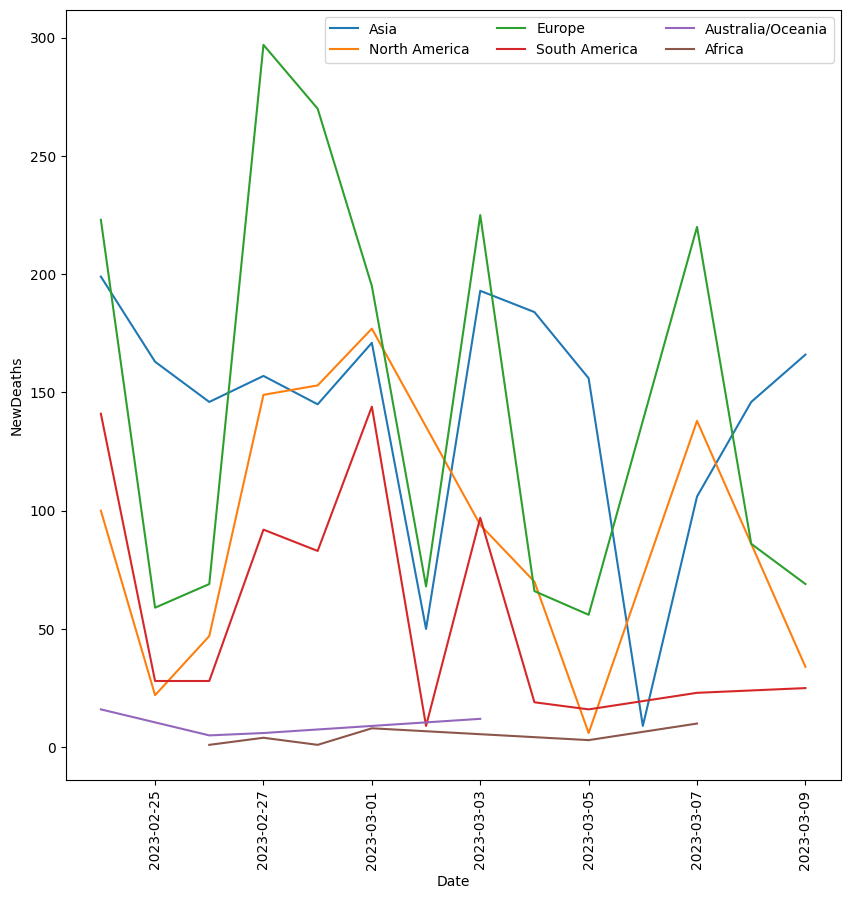

In [92]:
plt.figure(figsize=(10,10))
sns.lineplot(x="Date", y="NewDeaths",
             hue="Continent", data=continents_df)
plt.legend(ncol=3, bbox_to_anchor=(1,1))
plt.xticks(rotation=90)
plt.show()

(array([19413., 19415., 19417., 19419., 19421., 19423., 19425.]),
 [Text(19413.0, 0, '2023-02-25'),
  Text(19415.0, 0, '2023-02-27'),
  Text(19417.0, 0, '2023-03-01'),
  Text(19419.0, 0, '2023-03-03'),
  Text(19421.0, 0, '2023-03-05'),
  Text(19423.0, 0, '2023-03-07'),
  Text(19425.0, 0, '2023-03-09')])

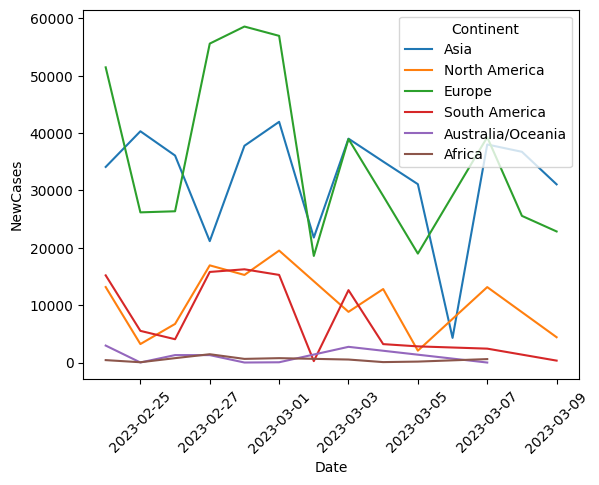

In [93]:
sns.lineplot(x="Date", y="NewCases",
             hue="Continent", data=continents_df)
plt.xticks(rotation=45)

(array([19413., 19415., 19417., 19419., 19421., 19423., 19425.]),
 [Text(19413.0, 0, '2023-02-25'),
  Text(19415.0, 0, '2023-02-27'),
  Text(19417.0, 0, '2023-03-01'),
  Text(19419.0, 0, '2023-03-03'),
  Text(19421.0, 0, '2023-03-05'),
  Text(19423.0, 0, '2023-03-07'),
  Text(19425.0, 0, '2023-03-09')])

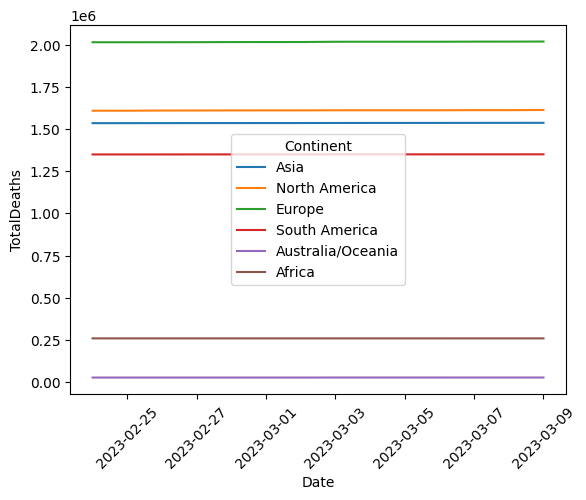

In [94]:
sns.lineplot(x="Date", y="TotalDeaths",
             hue="Continent", data=continents_df)
plt.xticks(rotation=45)

In [95]:
tmp_df =countries_df.groupby(['Date','Continent']).Population.sum().reset_index()
tmp_df

,Date,Continent,Population
0,2023-02-24,Africa,1.406729e+09
1,2023-02-24,Asia,4.711357e+09
2,2023-02-24,Australia/Oceania,4.347041e+07
3,2023-02-24,Europe,7.475438e+08
4,2023-02-24,North America,5.981409e+08
...,...,...,...
79,2023-03-09,Asia,4.711357e+09
80,2023-03-09,Australia/Oceania,4.347041e+07
81,2023-03-09,Europe,7.475438e+08
82,2023-03-09,North America,5.981409e+08


<Axes: xlabel='Continent', ylabel='Population'>

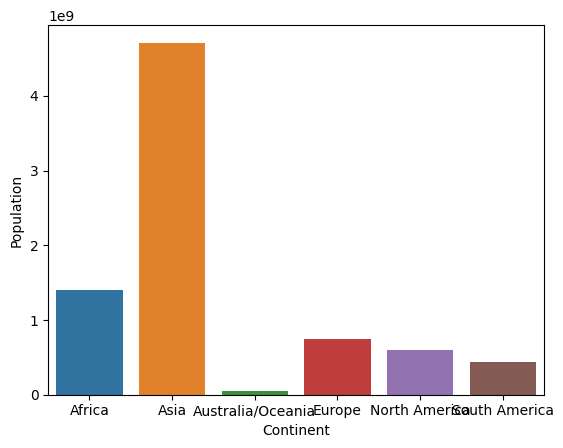

In [96]:
sns.barplot(data=tmp_df, x="Continent", y="Population")

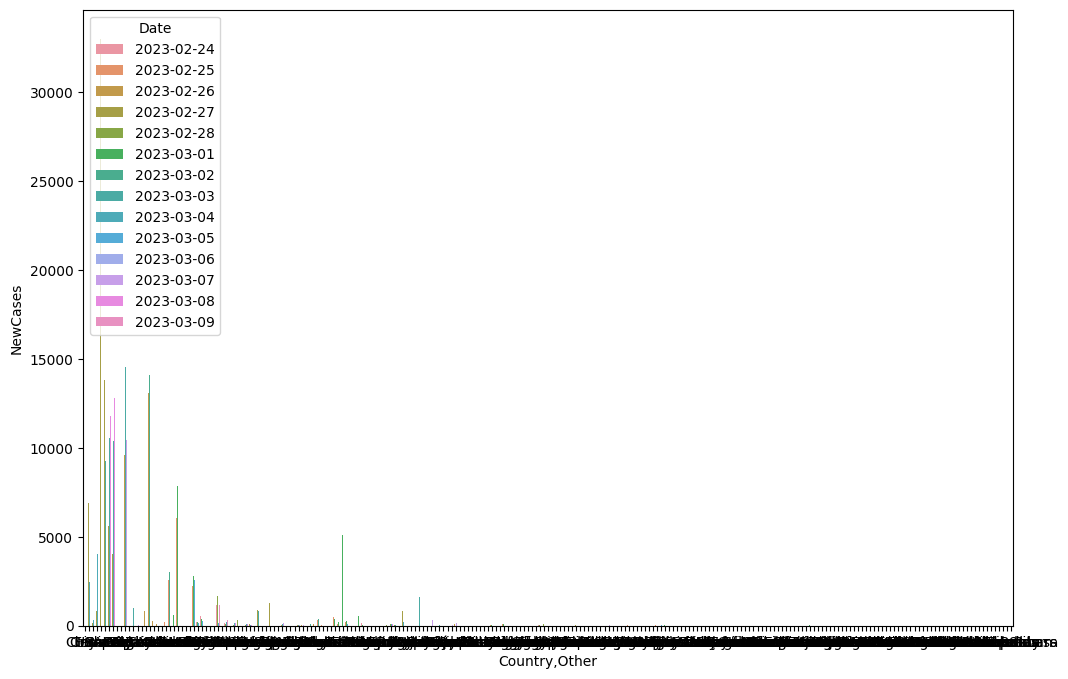

In [97]:
f = plt.figure(figsize=(12, 8))
fig = sns.barplot(data=countries_df, x = 'Country,Other', y = 'NewCases',hue='Date')

In [98]:
df = countries_df[countries_df['Date']==datetime.date.today()]

NameError: name 'datetime' is not defined

In [ ]:
countries_df[countries_df['Serious,Critical'] > 3000]